In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import os, json
%matplotlib inline

/Users/crankshaw/anaconda2/envs/clipper/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
results = []
for i in range(1,9,2):
    fn = "timit_user_eval_%d_to_%d.json" % (i, i + 1)
    with open("timit_user_eval_1_to_2.json") as f:
        r = json.load(f)
        results += r
    print len(results)
    

37
74
111
148


In [3]:
results[0]

{u'dialect': {u'corr': [29], u'inserts': [0], u'num': [32]},
 u'general': {u'corr': [22], u'inserts': [0], u'num': [32]},
 u'learned': {u'corr': [22, 22, 30, 26, 29, 29, 29, 29, 29],
  u'inserts': [0, 0, 0, 0, 0, 0, 0, 0, 0],
  u'num': [32, 32, 32, 32, 32, 32, 32, 32, 32]},
 u'learned_model': [u'undersampled_general_model',
  u'undersampled_general_model',
  u'dr5_model',
  u'dr6_model',
  u'dr1_model',
  u'dr1_model',
  u'dr1_model',
  u'dr1_model',
  u'dr1_model'],
 u'uname': u'mwbt0'}

In [4]:
def acc(c, i, n):
    return (c - i)/float(n)

def user_acc(u):
    dialect_acc = acc(u['dialect']['corr'][0], u['dialect']['inserts'][0], u['dialect']['num'][0])
    general_acc = acc(u['general']['corr'][0], u['general']['inserts'][0], u['general']['num'][0])
    learned_acc = []
    for i in range(len(u['learned']['corr'])):
        learned_acc.append(acc(u['learned']['corr'][i], u['learned']['inserts'][i], u['learned']['num'][i]))
    return (dialect_acc, general_acc, learned_acc)

In [5]:
dr_accs = []
gen_accs = []
learned_accs = []

for u in results:
    d, g, l = user_acc(u)
    dr_accs.append(d)
    gen_accs.append(g)
    learned_accs.append(l)
dr_accs = np.array(dr_accs)
gen_accs = np.array(gen_accs)
learned_accs = np.array(learned_accs)

In [7]:
print len(learned_accs)

148


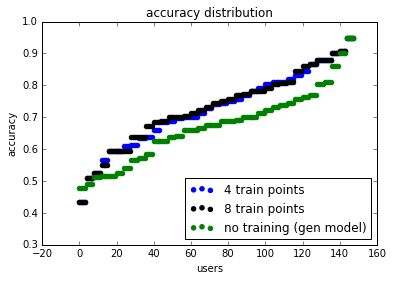

In [8]:
fig, ax = plt.subplots()
#ax.scatter(range(len(learned_accs)), np.sort(learned_accs[:,0]), color="r", label=str(0))
ax.scatter(range(len(learned_accs)), np.sort(learned_accs[:,4]), color="b", label="4 train points")
ax.scatter(range(len(learned_accs)), np.sort(learned_accs[:,8]), color="k", label="8 train points")
ax.scatter(range(len(gen_accs)), np.sort(gen_accs), color="g", label="no training (gen model)")
ax.legend(loc=4)
ax.set_title("accuracy distribution")
ax.set_ylabel("accuracy")
ax.set_xlabel("users")
plt.show()




## Average error across users

12.1655250606


[ 0.67311516  0.71406562  0.72347568  0.71644537  0.72819136  0.72831768
  0.72321614  0.7279544   0.73154905]


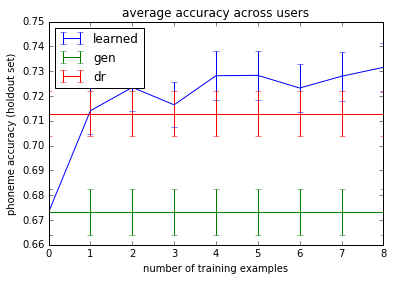

In [12]:
learned_ys = np.mean(learned_accs, axis=0)
num_train_examples = len(learned_accs)
se_div = np.sqrt(num_train_examples)
print learned_ys
learned_ys_errors = np.std(learned_accs, axis=0, ddof=1)
fig, ax = plt.subplots()
ax.errorbar(range(9), learned_ys, yerr = learned_ys_errors/se_div, label="learned")
ax.errorbar(range(9), np.ones(9)*np.mean(gen_accs), yerr=np.ones(9)*np.std(gen_accs, ddof=1)/se_div, label="gen")
ax.errorbar(range(9), np.ones(9)*np.mean(dr_accs), yerr=np.ones(9)*np.std(dr_accs, ddof=1)/se_div, label="dr")
ax.set_title("average accuracy across users")
ax.set_xlabel("number of training examples")
ax.set_ylabel("phoneme accuracy (holdout set)")
ax.legend(loc=0)

[ 0.67311516  0.71406562  0.72347568  0.71644537  0.72819136  0.72831768
  0.72321614  0.7279544   0.73154905]


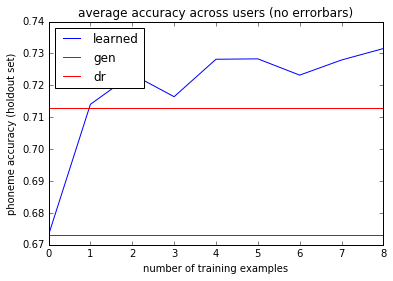

In [64]:
learned_ys = np.mean(learned_accs, axis=0)
print learned_ys
learned_ys_errors = np.std(learned_accs, axis=0, ddof=1)
fig, ax = plt.subplots()
ax.plot(range(9), learned_ys, label="learned")
ax.plot(range(9), np.ones(9)*np.mean(gen_accs), label="gen")
ax.plot(range(9), np.ones(9)*np.mean(dr_accs), label="dr")
ax.set_title("average accuracy across users (no errorbars)")
ax.set_xlabel("number of training examples")
ax.set_ylabel("phoneme accuracy (holdout set)")
ax.legend(loc=0)

[ 0.67567568  0.71698113  0.71698113  0.72413793  0.74137931  0.74137931
  0.72972973  0.73170732  0.74358974]


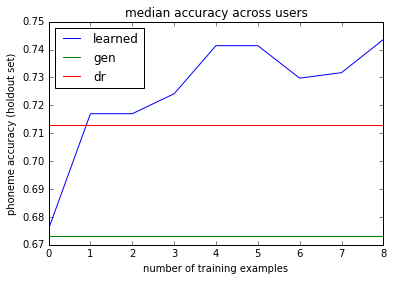

In [65]:
learned_ys = np.median(learned_accs, axis=0)
print learned_ys
learned_ys_errors = np.std(learned_accs, axis=0, ddof=1)
fig, ax = plt.subplots()
ax.plot(range(9), learned_ys, label="learned")
ax.plot(range(9), np.ones(9)*np.mean(gen_accs), label="gen")
ax.plot(range(9), np.ones(9)*np.mean(dr_accs), label="dr")
ax.set_title("median accuracy across users")
ax.set_xlabel("number of training examples")
ax.set_ylabel("phoneme accuracy (holdout set)")
ax.legend(loc=0)

### Percentage of users doing better than general model

In [58]:
def user_better_than_gen(u):
    best_user_model = u['learned_model'][-1]
    if best_user_model == 'undersampled_general_model':
        return np.zeros(9)
    else:
        model_use = []
        for i in range(9):
            if u['learned_model'][i] == best_user_model:
                model_use.append(1)
            else:
                model_use.append(0)
        return np.array(model_use)

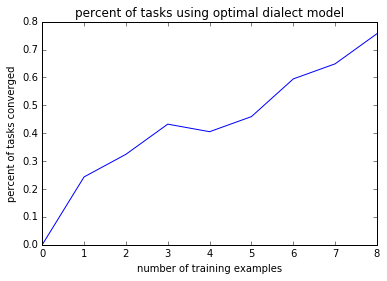

In [66]:
model_use_results = np.zeros(9)
for u in results:
    model_use_results += user_better_than_gen(u)
fig, ax = plt.subplots()
ax.plot(range(9), model_use_results/(np.ones(9) * len(results)))
ax.set_title("percent of tasks using optimal dialect model")
ax.set_xlabel("number of training examples")
ax.set_ylabel("percent of tasks converged")

In [50]:
aa = np.array([1,2,3])
bb = np.array([7,8,9])


In [51]:
aa += bb


In [52]:
print aa

[ 8 10 12]
